In [114]:
# Assignment 6.1
# Problem 1b: Decision Tree
# Author: Saurabh Biswas
# DSC550 T302

In [115]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import sys
%matplotlib inline


In [116]:
def file_read(filename):
    """This routine reads the file and loads it into a dataframe"""
    df1 = pd.read_csv(filename)
    return df1

In [117]:
def decision_tree(df1, maxdepth):
    """This function trains a decision tree model"""

    input_label = np.array(df1.columns[0:5])
    target_label = df1.columns[-1]

    target_ds = df1.iloc[:, -1]     # select last column as a target
    input_ds = df1.iloc[:, 0:5]     # select first 5 column as attributes
    seed = 20   # random seed for reproducibility
    DT_model = tree.DecisionTreeClassifier(random_state=seed, max_depth=maxdepth)   # invoke the model
    DT_model.fit(input_ds, target_ds)   # train the model
    print ('Decision tree model: ', DT_model)

    fig = plt.figure(figsize=(25, 20))            # size of the plot
    _ = tree.plot_tree(DT_model,                  # model
                       feature_names=input_label, # input attributes
                       class_names=['0','1'],  # class variable
                       filled=True)
    plt.title('Decision Tree with max depth as {}'.format(maxdepth), fontsize=25)
    plt.show()  # show the plot

Decision tree model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')


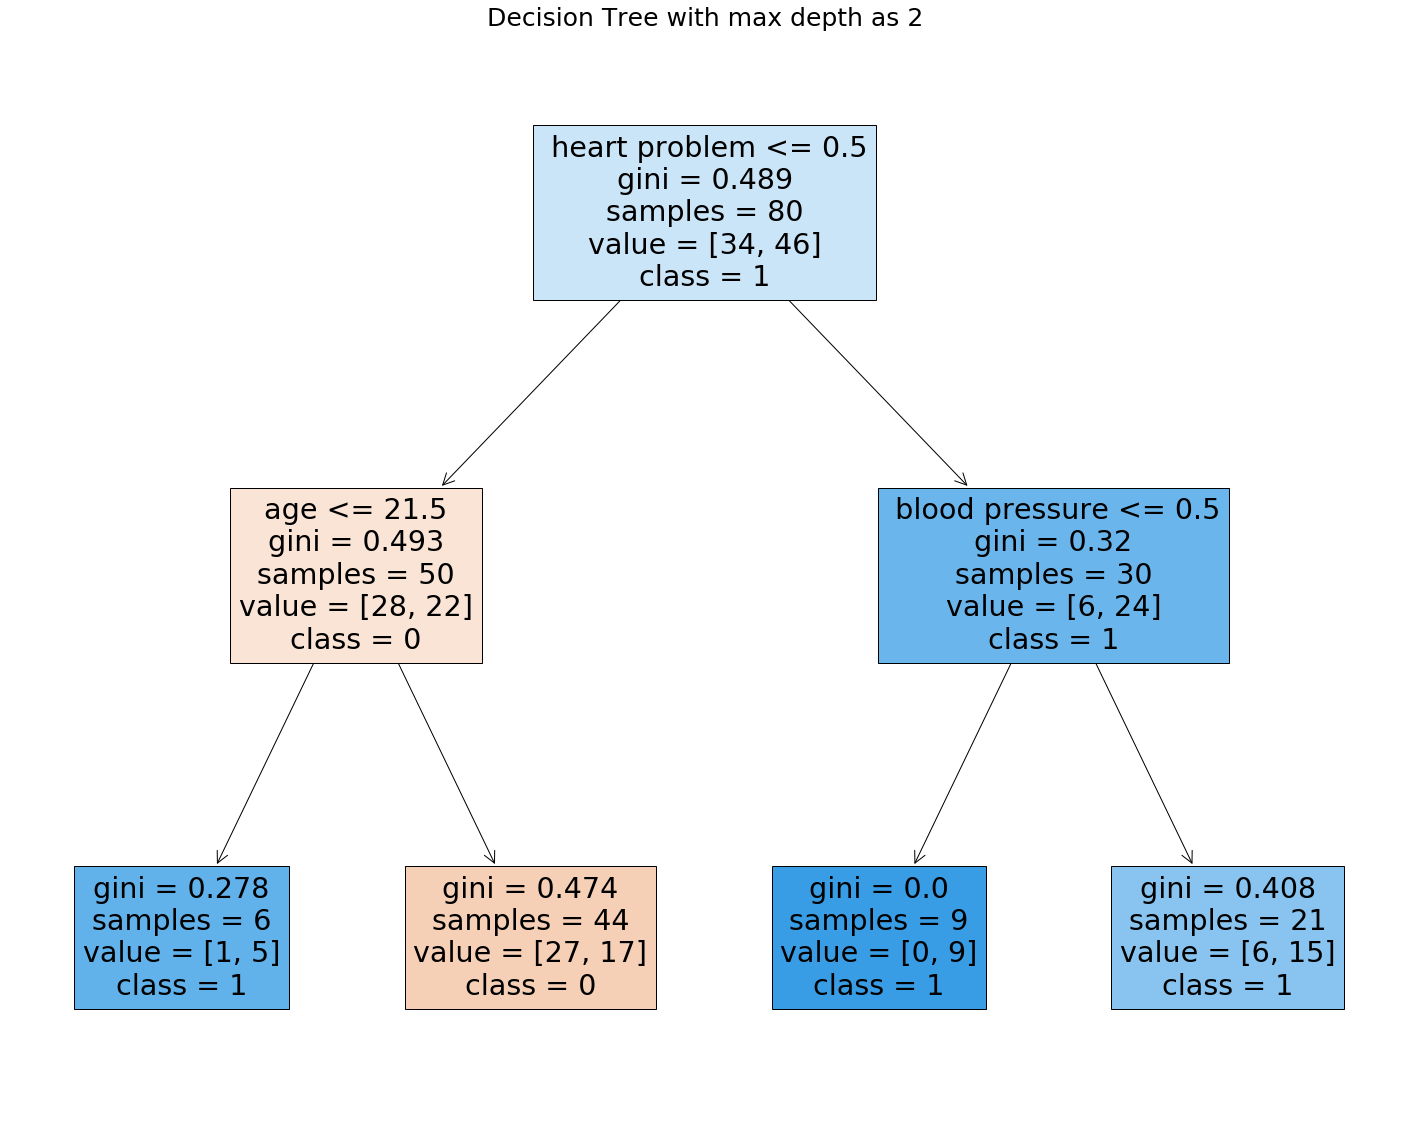

Decision tree model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')


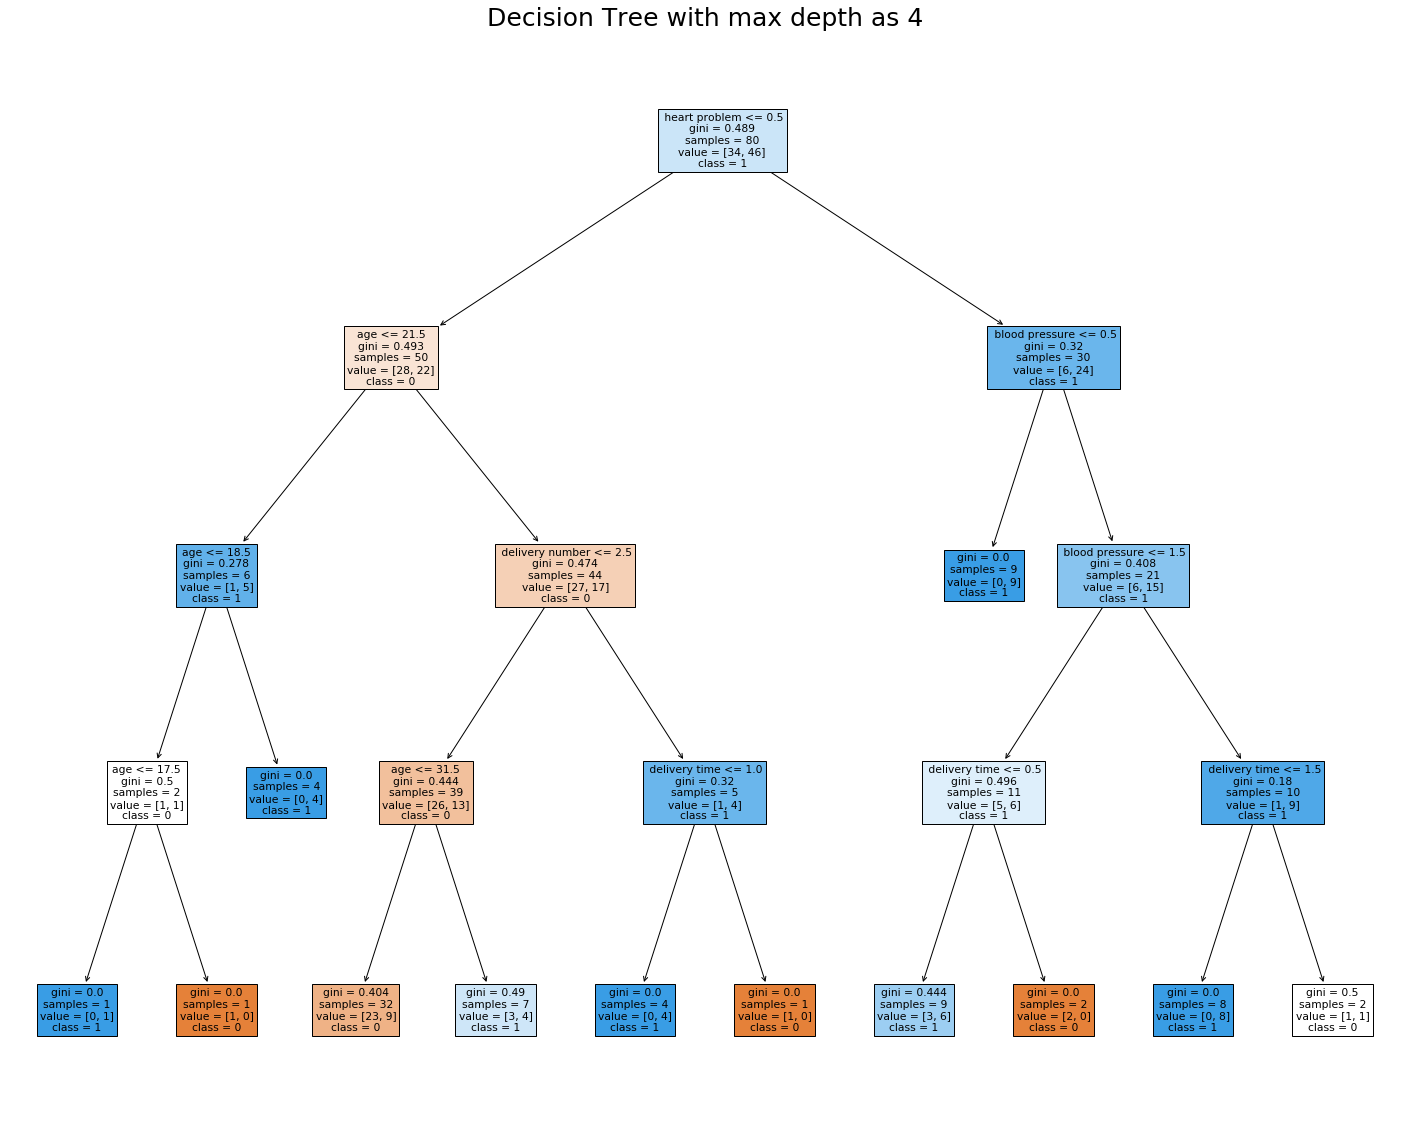

In [118]:
if __name__ == '__main__':

    try:
        df1 = file_read('caesarian.csv')    # read and load into dataframe
    except FileNotFoundError:
        print('File not found, please check the directory')
        sys.exit()
        
    decision_tree(df1, 2)  # invoke the decision tree model for depth 2
    decision_tree(df1, 4)  # invoke the decision tree model for depth 4

Maximum Depth plays an important part in training a decision tree model. If we have low maximum depth then the training data will underfit. If we make the maximum depth too much as compared to then the alogrithm may create a compex tree with many branches and cause overfitting. We need to do vary the max depth to obtain the high f1 score.   